# RL for Super Mario Bros

Refer to YouTube: Build an Mario AI Model with Python | Gaming Reinforcement Learning: https://youtu.be/2eeYqJ0uBKE

## Setup Mario

Setup a model to take random actions in each game.

In [1]:
# PyTorch
!conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/james/miniconda3/envs/cmpe260_dev

  added / updated specs:
    - pytorch
    - pytorch-cuda=11.7
    - torchaudio
    - torchvision


The following NEW packages will be INSTALLED:

  blas               pkgs/main/linux-64::blas-1.0-mkl 
  brotlipy           pkgs/main/linux-64::brotlipy-0.7.0-py310h7f8727e_1002 
  cffi               pkgs/main/linux-64::cffi-1.15.1-py310h5eee18b_3 
  charset-normalizer pkgs/main/noarch::charset-normalizer-2.0.4-pyhd3eb1b0_0 
  cryptography       pkgs/main/linux-64::cryptography-38.0.4-py310h9ce1e76_0 
  cuda               nvidia/linux-64::cuda-11.7.1-0 
  cuda-cccl          nvidia/linux-64::cuda-cccl-11.7.91-0 
  cuda-command-line~ nvidia/linux-64::cuda-command-line-tools-11.7.1-0 
  cuda-

In [46]:
# might need to install tensorboardx before pytorch.
# !conda install -c conda-forge tensorboardx -y
!pip install tensorboard

Solving environment: done

# All requested packages already installed.



In [100]:
# !conda install -c conda-forge protobuf -y

Solving environment: done

# All requested packages already installed.



In [3]:
# For RL Stuff
# pip install breaks gym and super_mario_bros
# !pip install stable-baselines3[extra]
!conda install -c conda-forge stable-baselines3 -y

Solving environment: done

## Package Plan ##

  environment location: /home/james/miniconda3/envs/cmpe260_dev

  added / updated specs:
    - stable-baselines3


The following NEW packages will be INSTALLED:

  bottleneck         pkgs/main/linux-64::bottleneck-1.3.5-py310ha9d4c09_0 
  cloudpickle        conda-forge/noarch::cloudpickle-2.2.1-pyhd8ed1ab_0 
  cycler             conda-forge/noarch::cycler-0.11.0-pyhd8ed1ab_0 
  gym                conda-forge/linux-64::gym-0.21.0-py310hfdc917e_2 
  kiwisolver         pkgs/main/linux-64::kiwisolver-1.4.4-py310h6a678d5_0 
  matplotlib-base    conda-forge/linux-64::matplotlib-base-3.4.3-py310h23f4a51_2 
  numexpr            pkgs/main/linux-64::numexpr-2.8.4-py310h8879344_0 
  packaging          conda-forge/noarch::packaging-23.0-pyhd8ed1ab_0 
  pandas             pkgs/main/linux-64::pandas-1.5.2-py310h1128e8f_0 
  pyparsing          conda-forge/noarch::pyparsing-3.0.9-pyhd8ed1ab_0 
  python-dateutil    conda-forge/noarch::python-dateutil-2.8.

In [4]:
!pip install opencv-python gym_super_mario_bros==7.3.0 nes_py

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.6 MB/s eta 0:00:003.4 MB/s eta 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 14.0 MB/s eta 0:00:00
  Created wheel for nes_py: filename=nes_py-8.2.1-cp310-cp310-linux_x86_64.whl size=48185 sha256=fedff7642ce79719368f78334628a5f20e0ceb006a06687d347521ada178e61e
  Stored in directory: /tmp/pip-ephem-wheel-cache-0awcmbcu/wheels/bc/1a/6e/27afc1393514b773012ff8d89f77ed4fa02055aa36f39d43df
Successfully built nes_py


In [1]:
# Import the game
import gym
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# setup game
env = gym_super_mario_bros.make("SuperMarioBros-v0")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
# Create a flag restart or not
done = True
# Loop through each frame in the game
for step in range(100000):
    # Start the game to begin with
    if done:
        # Start the game
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # done = terminated or truncated
    # Show the game on the screen
    env.render()
# Close the game
env.close()

/home/james/miniconda3/envs/cmpe260_dev/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [4]:
env.close()

## Preprocess Environment

In [17]:
# !pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [22]:
# Import FrameStack Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [23]:
# 1. Create the base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0")

# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)

# 4. Wrap inside the Dummy Environment (place our env in another array)
env = DummyVecEnv([lambda: env])

# 5. Pass env through frame stack, Stack the frames up to 4
env = VecFrameStack(env, 4, channels_order='last')

In [24]:
state = env.reset()

In [25]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [26]:
# since env placed in array via DummyVecEnv, we have 1 in front
# since we pass env in frame stack, last is 4
state.shape

(1, 240, 256, 4)

In [27]:
# each step gets us another stacked frame, keep doing eventually get 4 stacked
# note: 1st step is 1 frame
# Instead of random action [env.action_space.sample()], jump [5] action
state, reward, done, info = env.step([5])

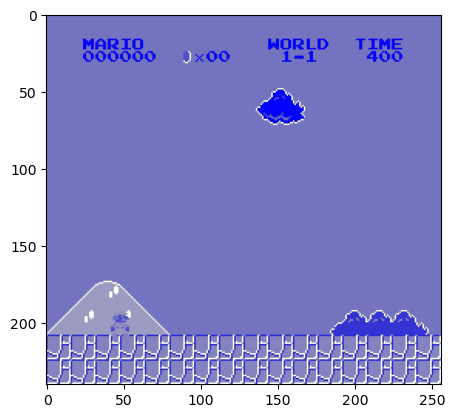

In [28]:
# since env is placed in array, we need to get by index
# Due to VecFrameStack, we have 4 diff imgs stacked together
plt.imshow(state[0])

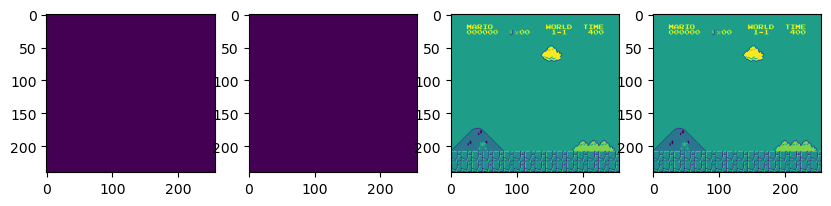

In [29]:
# represents each one of our diff stacked frames, display them
# note: num of frames is impacted based on our steps in previous code box
# For [5] jump action, keep looping and running code box with env.step until see mario jump
# also our RL agent will have some kind of memory, it will be able to see when playing as mario
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## Train the RL Model

In [30]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [31]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
            
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, "best_model_{}".format(self.n_calls))
            self.model.save(model_path)
        return True

In [32]:
CHECKPOINT_DIR = "./train/"
LOG_DIR = "./logs/"

In [33]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [34]:
# This is the AI model started
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001,
            n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn
# timesteps is how many frames our model is going to be able to see
# imagine every single move is a frame
# NOTE: In terminal, tensorboard --logdir=runs
model.learn(total_timesteps=4000000, callback=callback)

Logging to ./logs/PPO_2
----------------------------
| time/              |     |
|    fps             | 210 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 131           |
|    iterations           | 2             |
|    time_elapsed         | 7             |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.7860672e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00535      |
|    learning_rate        | 1e-06         |
|    loss                 | 165           |
|    n_updates            | 10            |
|    policy_gradient_loss | -5.02e-05     |
|    value_loss           | 401           |
-------------------------

## Test it Out

Trained the DRL agent's DL model over steps

- 500K is where mario started doing better
- 1M is where mario fell into holes
- 2M & 3M similar as above, but went longer too
- 4M is where mario was able to finish the level

In [18]:
model = PPO.load('./train/best_model_110000.zip')

In [19]:
state = env.reset()
while True:
    action, state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

/home/james/miniconda3/envs/cmpe260_dev/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [20]:
env.close()

## Ways to Improve Performance

Ways to improve our DRL Agent is to train it longer with a slower learning rate. This means it will take us longer to teach our model how to actually perform in a game, but ideally it should end up in a better outcome.

We could also try multi-processing, this means that our AI model plays multiple games, which should effectively mean that it plays faster.

Last thing that we can try is a different algorithm.

What game is next?